# Практическая работа №1: Обработка изображений

Импортируем все необходимые библиотеки

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

### Задача 1: Загрузка изображения
Загружаем `sar_1_gray.jpg` и отображаем его.

Изображение sar_1_gray.jpg успешно загружено.
Размер изображения: (400, 600)


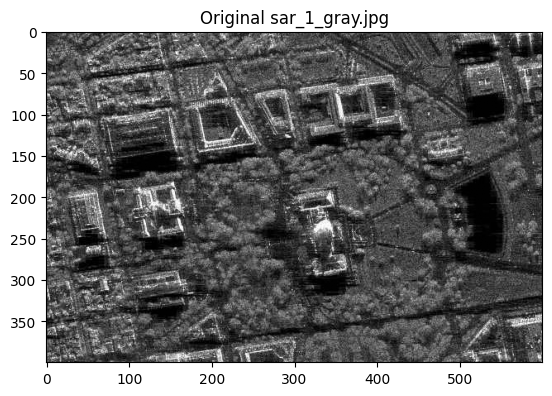

In [2]:
image_path = "sar_1_gray.jpg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is not None:
    print(f"Изображение {image_path} успешно загружено.")
    print(f"Размер изображения: {gray_image.shape}")
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original sar_1_gray.jpg")
    plt.show()
else:
    print(f"Не удалось загрузить изображение по пути: {image_path}")

### Задача 2: Построение гистограммы

C:\Users\danak\AppData\Local\Temp\ipykernel_6292\2807405933.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_image.ravel(), 256, [0, 256])


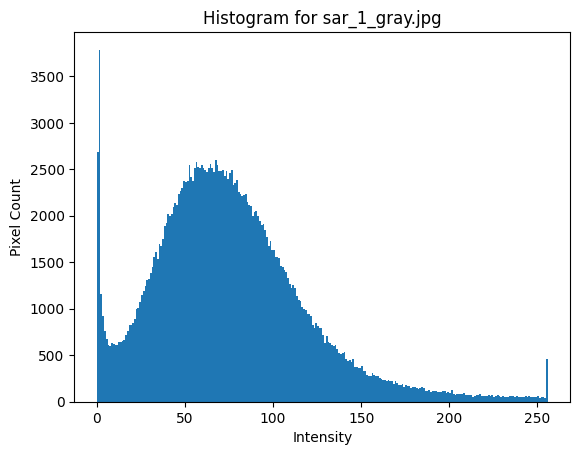

In [3]:
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title("Histogram for sar_1_gray.jpg")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()

### Задача 3: Гамма-коррекция

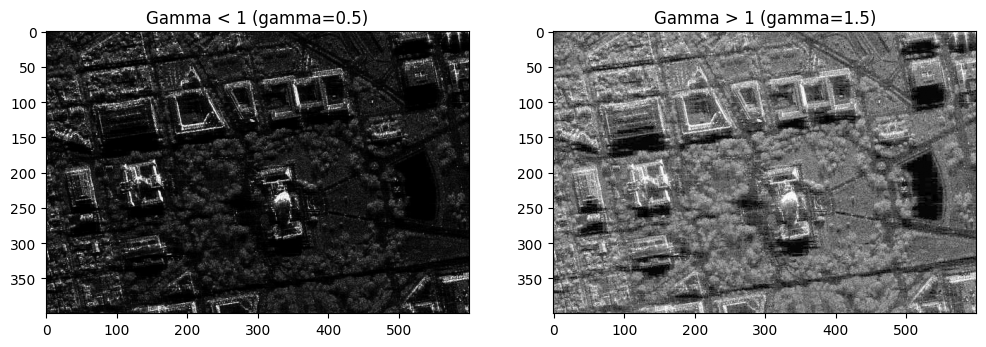

In [4]:
def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

gamma_low = 0.5
gamma_high = 1.5
corrected_low = gamma_correction(gray_image, gamma_low)
corrected_high = gamma_correction(gray_image, gamma_high)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(corrected_low, cmap='gray')
plt.title(f'Gamma < 1 (gamma={gamma_low})')

plt.subplot(1, 2, 2)
plt.imshow(corrected_high, cmap='gray')
plt.title(f'Gamma > 1 (gamma={gamma_high})')

plt.show()

### Задача 4: Сравнение изображений (MSE, SSIM)

In [5]:
mse_low = mse(gray_image, corrected_low)
ssim_low = ssim(gray_image, corrected_low)
mse_high = mse(gray_image, corrected_high)
ssim_high = ssim(gray_image, corrected_high)

print(f"Gamma < 1 (gamma={gamma_low}):")
print(f"  MSE: {mse_low:.2f}")
print(f"  SSIM: {ssim_low:.2f}")
print("---")
print(f"Gamma > 1 (gamma={gamma_high}):")
print(f"  MSE: {mse_high:.2f}")
print(f"  SSIM: {ssim_high:.2f}")

Gamma < 1 (gamma=0.5):
  MSE: 2383.76
  SSIM: 0.53
---
Gamma > 1 (gamma=1.5):
  MSE: 1114.45
  SSIM: 0.89


### Задача 5: Статистическая цветокоррекция
Реализуем алгоритм на основе статистики (среднее и стандартное отклонение) другого изображения.

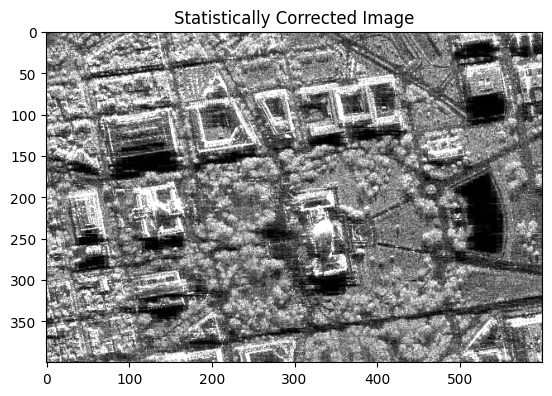

In [6]:
image_for_stats_path = "sar_2_color.jpg"
image_for_stats = cv2.imread(image_for_stats_path, cv2.IMREAD_GRAYSCALE)

if image_for_stats is not None:
    # Используем эквализированное изображение как источник статистики
    eq_gray = cv2.equalizeHist(image_for_stats)
    
    (target_mean, target_std) = cv2.meanStdDev(gray_image)
    (source_mean, source_std) = cv2.meanStdDev(eq_gray)

    stat_corrected_image = (gray_image - target_mean) * (source_std / target_std) + source_mean
    stat_corrected_image = np.clip(stat_corrected_image, 0, 255).astype("uint8")
    
    plt.imshow(stat_corrected_image, cmap='gray')
    plt.title("Statistically Corrected Image")
    plt.show()
else:
    print(f"Не удалось загрузить {image_for_stats_path} для статистической коррекции")

### Задача 6: Пороговая фильтрация

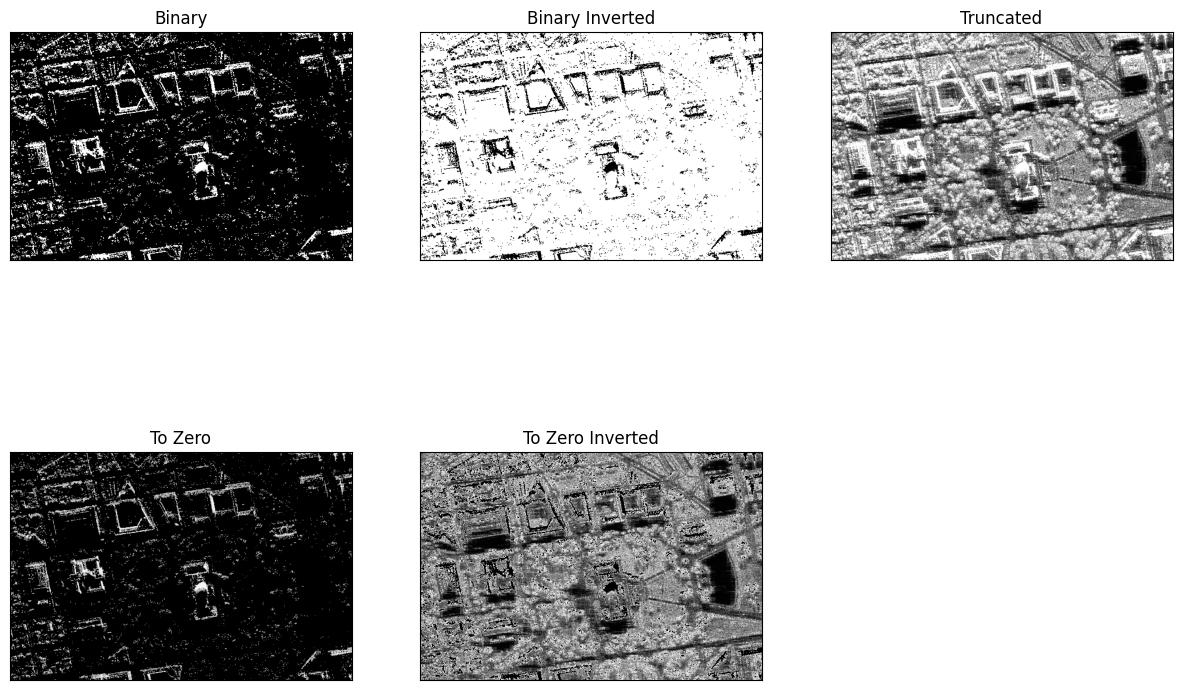

In [7]:
ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
ret, thresh_binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh_trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
ret, thresh_tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
ret, thresh_tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Binary', 'Binary Inverted', 'Truncated', 'To Zero', 'To Zero Inverted']
images = [thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()